In [1]:
from source import *

import warnings; warnings.filterwarnings('ignore')

# Data Science Case Study: Supplier Audit Results Prediction

by: Juan Betancourt

juan.beta98@gmail.com

# Contents

1. Brief Case Study Description

2. Data Exploration and Assumptions Formulation

3. Preprocessing the Data

4. Predictor Selection

5. Best Model Selection

6. Prediction for Audit Results

7. Business Recomendations

8. Model Maintenance

9. Additional Ideas

# 1.Brief Case Study Description


<br><div style="text-align: justify"> 
Managing suppliers is a critical aspect of the operational efficiency of any manufacturing company. Issues such as irregular lead times, backlogs, and incorrect orders can significantly disrupt manufacturing schedules, increase costs, and ultimately impact the service level provided to customers. In the context of this case study, our focus is on predicting the outcome of audits for a specific supplier and derivative combination.
</div> 

<br><div style="text-align: justify"> 
The process involves three stages: T1, T2, and T3. The goal is to forecast the most recent qualification status for a given supplier and derivative in their final audit stage. To achieve this objective, we have access to two datasets. The first dataset comprises essential information regarding the audit history of suppliers and the derivatives under their management. The second dataset provides diverse metrics related to the performance of suppliers.
</div> 

# 2.Data Exploration

## 2.1 Initial Exploration

The initial stage of data exploration involves obtaining a comprehensive overview of the datasets. This includes understanding the structure, content, and key characteristics of the available data.

### 2.1.1 _AuditHistory_ dataset

In [2]:
AuditHistory.head()

,SupplierId,RecentMonth,RecentTimeStamp,DerivativeName,DerivativeRegion,ProductionLine,T1Color,T2Color,T3Color,Result
0,f763999191217e9945b26d312d0902d5,2022-06,2022-06-30T10:01:20Z,3c4d48ad7d892bfe96a6df0fabe6deaa,Asia,LU,Green,Green,-,Green
1,377c62276b7dd74e406ac5de3c872110,2022-09,2022-09-28T07:00:46Z,2dc5fe1b4f8895bb1096f6470b7d8550,Europe,LG,Green,Green,Green,Green
2,20beb9edfc8536f19109a15b5ce1a845,2022-09,2022-09-28T07:00:46Z,9c491ff90cbfc2882aa1116944658240,Europe,LC,Green,Green,Green,Green
3,d0ae2fdd6681f6f99469af4f1ede3928,2022-10,2022-10-31T11:01:25Z,3724c242924ad7b7871634355d6ee63e,USA,LC,Green,Green,Green,Green
4,4668950356774590b25d92473b8756d9,2022-02,2022-02-28T11:01:17Z,99904aba55dd386296e5925bac70abe0,Europe,LU,Green,Red,-,Red


In [3]:
AuditHistory.describe()

,SupplierId,RecentMonth,RecentTimeStamp,DerivativeName,DerivativeRegion,ProductionLine,T1Color,T2Color,T3Color,Result
count,7690,7690,7690,7690,7547,7690,7690,7690,7690,7690
unique,818,9,9,75,5,4,3,4,4,3
top,4600f0a901054216cf0eecf2999f7eb2,2022-10,2022-10-31T11:01:25Z,9c491ff90cbfc2882aa1116944658240,Europe,LC,Green,Green,Green,Green
freq,36,989,989,760,3643,2737,7417,5499,4178,6797


In [4]:
AuditHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SupplierId        7690 non-null   object
 1   RecentMonth       7690 non-null   object
 2   RecentTimeStamp   7690 non-null   object
 3   DerivativeName    7690 non-null   object
 4   DerivativeRegion  7547 non-null   object
 5   ProductionLine    7690 non-null   object
 6   T1Color           7690 non-null   object
 7   T2Color           7690 non-null   object
 8   T3Color           7690 non-null   object
 9   Result            7690 non-null   object
dtypes: object(10)
memory usage: 600.9+ KB


This dataset has 10 columns and 7690 entries. As there are various categorical features, here are some details:

- The dataset covers a time interval of 9 different months.
- A total of 818 suppliers, 75 derivatives, five (5) regions, and four (4) production lines are registered.

The only column with missing values is the _derivative region_ with 143 missing values.

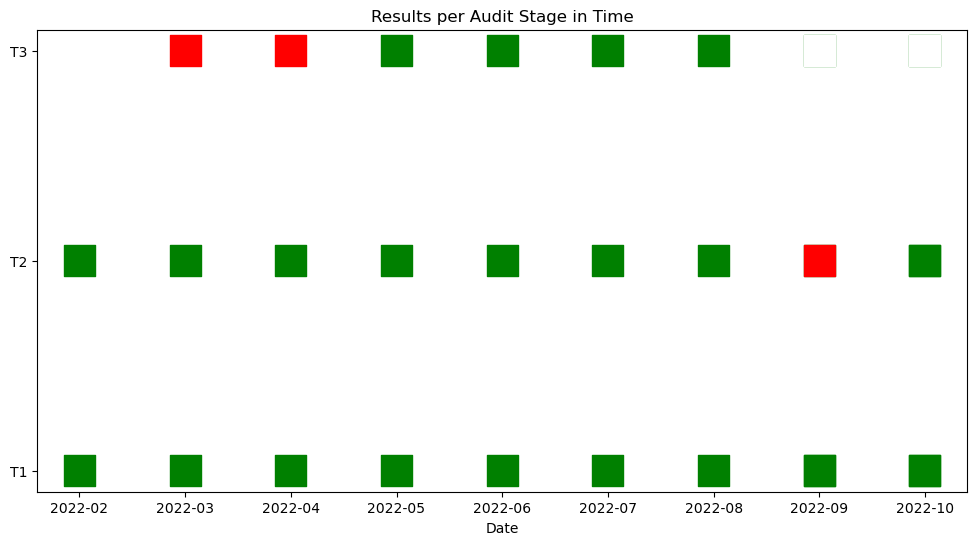

In [5]:
plot_audit_colors(AuditHistory,'377c62276b7dd74e406ac5de3c872110','2dc5fe1b4f8895bb1096f6470b7d8550')

### 2.1.2 _SupplierPerformance_ dataset

In [6]:
SupplierPerformance.head()

,Amount_WD_3M,Amount_WD_6M,Amount_WD_12M,Amount_Backlogs_3M,Amount_Backlogs_6M,Amount_Backlogs_12M,12_Month_LPKM,BadSupplierIndicator
SupplierId,,,,,,,,
68586a014afa6b343289dc017a95816e,0,0,0,0,0,0,5.0,NaN
075c37dc9fcacb082ef1bd4a3dae0c11,0,0,0,0,0,0,5.0,NaN
f9174001e40db58b4c1e21dd2de38536,0,0,0,0,0,0,5.0,NaN
557b239e840c24ed9592ed3ceb13326f,0,0,0,13,30,57,3.9,NaN
d74b6825c6a9283c834e713798bd0ccc,0,0,0,0,0,0,5.0,NaN


In [7]:
SupplierPerformance.describe(include='all')

,Amount_WD_3M,Amount_WD_6M,Amount_WD_12M,Amount_Backlogs_3M,Amount_Backlogs_6M,Amount_Backlogs_12M,12_Month_LPKM,BadSupplierIndicator
count,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5498.000000,332
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332
mean,0.169329,0.425897,0.893697,2.150781,4.103555,7.386227,4.576155,NaN
std,0.810342,1.668909,3.228480,6.897040,12.144191,20.716048,0.578818,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,NaN
75%,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,5.000000,NaN


In [8]:
SupplierPerformance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5823 entries, 68586a014afa6b343289dc017a95816e to e2d0d6a487351b44979611167ba19040
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_WD_3M          5823 non-null   int64  
 1   Amount_WD_6M          5823 non-null   int64  
 2   Amount_WD_12M         5823 non-null   int64  
 3   Amount_Backlogs_3M    5823 non-null   int64  
 4   Amount_Backlogs_6M    5823 non-null   int64  
 5   Amount_Backlogs_12M   5823 non-null   int64  
 6   12_Month_LPKM         5498 non-null   float64
 7   BadSupplierIndicator  332 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 409.4+ KB


This dataset comprises 8 columns and 5823 entries. Here, most features, except for _BadSupplierIndicator_, consist of numeric data. Here are some details:

- Suppliers exhibit a significantly higher number of backlogs than wrong deliveries.

<br><div style="text-align: justify"> 
Two columns have missing data: *12_Month_LPKM* with 325 missing values and _BadSupplierIndicator_ with 5491 missing values. Upon closer inspection of the latter, we find that this column is encoded with 'bad' for suppliers with previous poor performance and nothing for all others. Therefore, one-hot encoding this column with 1 for poor performance and 0 for all others will resolve this issue.
</div> 

<br><div style="text-align: justify"> 
Another important detail is that this table has 5823 entries, each corresponding to a different supplier. In the _AuditHistory_ dataset, there are only 818 suppliers, indicating that most of the suppliers in this dataset lack audit data. These suppliers will be discarded, as there is not sufficient data to incorporate them into the model.
</div> 

In [9]:
SupplierPerformance['BadSupplierIndicator']=SupplierPerformance['BadSupplierIndicator'].fillna(0).map({'bad':1,0:0})
SupplierPerformance = SupplierPerformance[SupplierPerformance.index.isin(Suppliers)]

## 2.2 Distribution Analysis

The next stage of dataset exploration involves conducting a distribution analysis. This analysis aims to provide insights into the distribution patterns of both numeric and categorical features.

### 2.2.1 _AuditHistory_ dataset

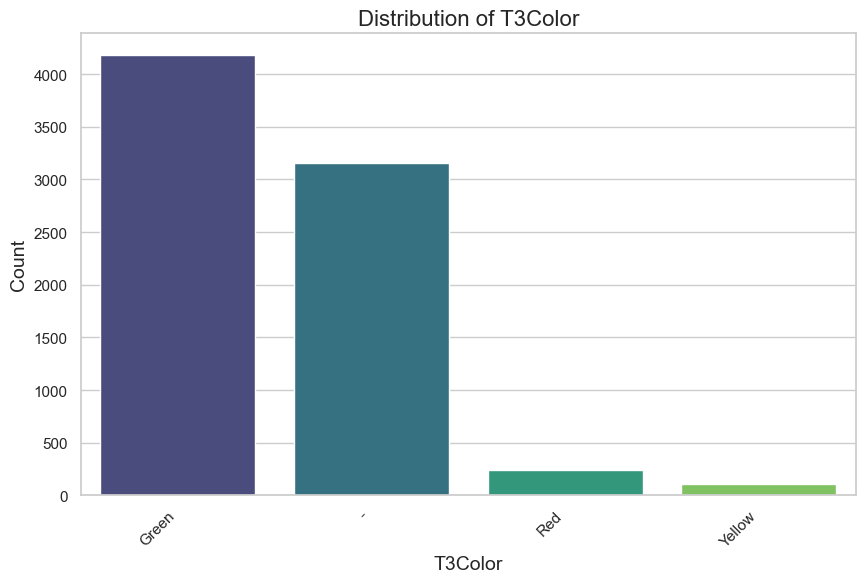

In [10]:
cols = list(AuditHistory.columns)[1:]
col_name = cols[7]
plot_categorical_distribution(col_name)

Some relevant insights of the features:
<br><div style="text-align: justify"> 
- The number of observations exhibits a growing trend from February 2022 to October 2022, indicating an increasing volume over time.
- The majority of derivatives are sourced from Europe, with South Africa contributing only a minimal number of units.
- Among production lines, LC stands out with the highest number of observations, exceeding 2500, while LG has a comparatively lower count, with around 1250 observations.
- In Phase T1, the majority of observations have green qualifications, with very few instances of yellow and red qualifications. In Phase T2, there is also a predominance of green qualifications, but unlike T1, T2 has a notable number of empty observations, along with very few yellow and red qualifications. Moving to Phase T3, the number of green observations is lower (around 4200), accompanied by a significant number of empty observations (approximately 3100). The occurrences of yellow and red qualifications are still relatively higher compared to T1 and T2.
</div> 

### 2.2.2 _SupplierPerformance_ dataset

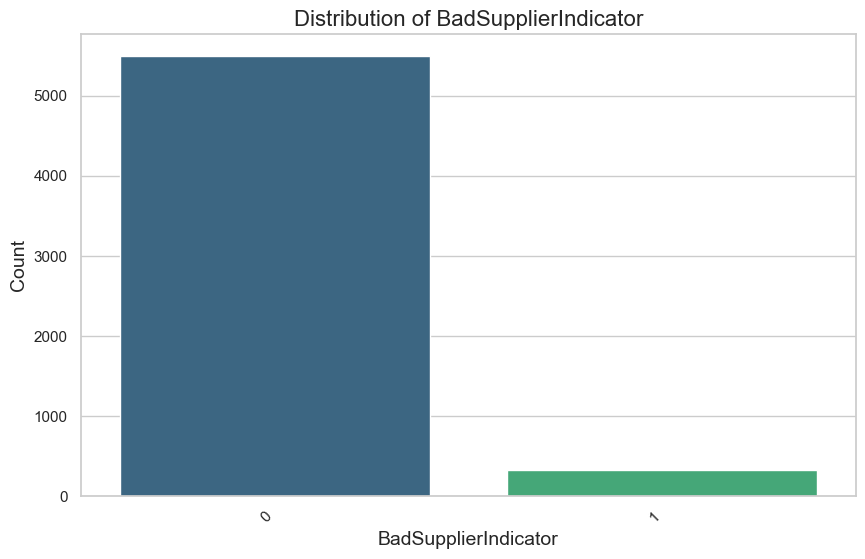

In [11]:
cols = list(SupplierPerformance.columns)
col_name = cols[7]
plot_numerical_distribution(col_name)

Some relevant insights of the features:

- The difference between the amount of wrong deliveries and the backlogs is displayed with the histogram. 
- Only a small proportion of suppliers have a 'bad' indicator.

## 2.3 Correlation

### 2.3.1 _SupplierPerformance_ dataset

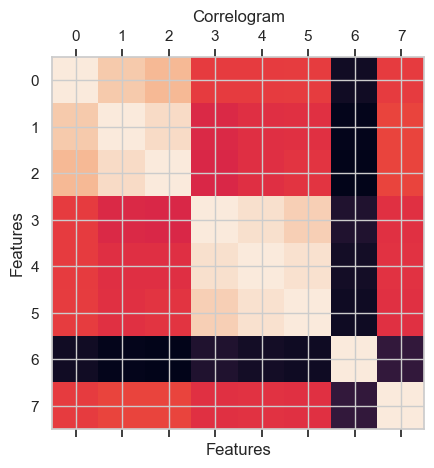

In [12]:
plt.matshow(SupplierPerformance.corr())
plt.title('Correlogram'); plt.xlabel('Features');plt.ylabel('Features')
plt.show()

In [13]:
SupplierPerformance.corr()

,Amount_WD_3M,Amount_WD_6M,Amount_WD_12M,Amount_Backlogs_3M,Amount_Backlogs_6M,Amount_Backlogs_12M,12_Month_LPKM,BadSupplierIndicator
Amount_WD_3M,1.000000,0.863669,0.796155,0.364869,0.362897,0.366831,-0.486830,0.365955
Amount_WD_6M,0.863669,1.000000,0.937839,0.296502,0.318937,0.326812,-0.546646,0.396434
Amount_WD_12M,0.796155,0.937839,1.000000,0.287715,0.318089,0.339394,-0.559784,0.395572
Amount_Backlogs_3M,0.364869,0.296502,0.287715,1.000000,0.956793,0.889368,-0.420424,0.324905
Amount_Backlogs_6M,0.362897,0.318937,0.318089,0.956793,1.000000,0.963074,-0.476322,0.334158
Amount_Backlogs_12M,0.366831,0.326812,0.339394,0.889368,0.963074,1.000000,-0.498836,0.329666
12_Month_LPKM,-0.486830,-0.546646,-0.559784,-0.420424,-0.476322,-0.498836,1.000000,-0.348491
BadSupplierIndicator,0.365955,0.396434,0.395572,0.324905,0.334158,0.329666,-0.348491,1.000000


## 2.4 Missing Values

### 2.4.1 _AuditHistory_ dataset

In [14]:
Audits_nan_counts = AuditHistory.isna().sum()
print(Audits_nan_counts)

SupplierId            0
RecentMonth           0
RecentTimeStamp       0
DerivativeName        0
DerivativeRegion    143
ProductionLine        0
T1Color               0
T2Color               0
T3Color               0
Result                0
dtype: int64


### 2.4.2 _SupplierPerformance_ dataset

In [15]:
Suppliers_nan_counts = SupplierPerformance.isna().sum()
print(Suppliers_nan_counts)

Amount_WD_3M            0
Amount_WD_6M            0
Amount_WD_12M           0
Amount_Backlogs_3M      0
Amount_Backlogs_6M      0
Amount_Backlogs_12M     0
12_Month_LPKM           6
BadSupplierIndicator    0
dtype: int64


## 2.5 Assumptions
<br><div style="text-align: justify"> 
1. The _AuditHistory_ and _SupplierPerformance_ datasets are chronologically linked. This implies that the three, six, and 12-month markers in the latter dataset correspond to the respective preceding three, six, and 12 months relative to the latest audit date.

2. The _WrongDeliveries_ and _Backorders_ generated in the last 7-12 months (refering to the _SupplierPerformance_ dataset) were uniformly distributed between the two trimesters.
</div> 

# 3.Preprocessing the Data

The initial data processing steps involve assigning numerical values to categorical features, such as _DerivativeRegion_ and _ProductionLine_. Additionally, the _RecentTimeStamp_ column will be removed, as _RecentMonth_ provides a more concise representation of the time observation.

In [16]:
AuditHistory,encoding = code_categorical_columns(AuditHistory,['DerivativeRegion','ProductionLine','T1Color','T2Color','T3Color','Result'])
AuditHistory.drop(labels='RecentTimeStamp',axis=1,inplace=True)
AuditHistory.head()

,SupplierId,RecentMonth,DerivativeName,DerivativeRegion,ProductionLine,T1Color,T2Color,T3Color,Result
0,f763999191217e9945b26d312d0902d5,2022-06,3c4d48ad7d892bfe96a6df0fabe6deaa,1,1,2,2,1,2
1,377c62276b7dd74e406ac5de3c872110,2022-09,2dc5fe1b4f8895bb1096f6470b7d8550,2,2,2,2,2,2
2,20beb9edfc8536f19109a15b5ce1a845,2022-09,9c491ff90cbfc2882aa1116944658240,2,3,2,2,2,2
3,d0ae2fdd6681f6f99469af4f1ede3928,2022-10,3724c242924ad7b7871634355d6ee63e,3,3,2,2,2,2
4,4668950356774590b25d92473b8756d9,2022-02,99904aba55dd386296e5925bac70abe0,2,1,2,4,1,4


<br><div style="text-align: justify"> 
My initial approach involves developing a machine learning algorithm for each audit stage (T1, T2, and T3). Each algorithm is designed to predict the qualification for its respective stage. By obtaining predictions from all three algorithms, the final result can be determined as the qualification of the latest audit stage. This approach also provides the opportunity to identify if any stage is particularly sensitive to specific features.

To build these models, the next step is to define the features for each algorithm. Relevant information from the derivative, such as _DerivativeRegion_ and _ProductionLine_, and from the supplier, such as 'LPKM' and _BadSupplierIndicator_, will be incorporated. 
</div>

In [17]:
x_values = SupplierPerformance[['12_Month_LPKM','BadSupplierIndicator']].copy()
x = pd.merge(AuditHistory[['DerivativeRegion', 'ProductionLine', 'SupplierId']], x_values, left_on='SupplierId', right_index=True, how='left')
x.drop('SupplierId',axis=1,inplace=True)
x.head()

,DerivativeRegion,ProductionLine,12_Month_LPKM,BadSupplierIndicator
0,1,1,NaN,NaN
1,2,2,4.7,0.0
2,2,3,4.2,0.0
3,3,3,4.5,0.0
4,2,1,3.9,1.0


Additionally, information regarding the chronological sequence of audit results and the supplier's three, six, and 12 months metrics will be considered.
<br><div style="text-align: justify"> 
- **_WrongDeliveriesInTrim_ and _BacklogsInTrim:_** Assuming a chronological link between the datasets, the month of the audit can be mapped to whether it falls into the 3 prior months, between the 4 and 6 prior months, or on the 7 to 9 months. Applying this logic, each observation in the _AuditHistory_ dataset can be assigned values for 'wrong deliveries' and 'backlogs' based on the trimester and supplier to which they belong. For instance, audits in August, September, and October would fall into the 3 months prior category and receive corresponding values for *Amount_WD_3M*. On the other hand, audits in May, June, and July belong to the 4 to 6 months prior range and would be assigned values calculated as *Amount_WD_6M* - *Amount_WD_3M* (representing the amount of wrong deliveries generated in that second trimester). Finally, audits in February, March, and April fall into the 7 - 9 months range. Since Amount_WD_12M covers 12 months, the number of wrong deliveries in this interval would be (*Amount_WD_12M* - *Amount_WD_6M*)/2. This introduces a new feature referred to as _WrongDeliveriesInTrimester_ and _BacklogsInTrimester_.
</div>

In [18]:
WrongDeliveriesInTrim,BacklogsInTrim = generate_temporal_WDandBL(AuditHistory,SupplierPerformance)
x['WrongDeliveriesInTrim'] = WrongDeliveriesInTrim
x['BacklogsInTrim'] = BacklogsInTrim

<br><div style="text-align: justify"> 
For each observation with a prior chronological observation, we can compute several relevant metrics:

- **_LatestQualification_:** Determine the qualification achieved in the latest audit visit for that audit stage.

- **_LastAudit_**: Measure the time elapsed between the current audit and the previous one.

</div>

In [19]:
LatestQualification,LastAudit = generate_chronological_features(AuditHistory,SupplierPerformance)
for i in [1,2,3]:
    x[f'LatestQualificationT{i}'] = LatestQualification[i]

In [20]:
x.head()

,DerivativeRegion,ProductionLine,12_Month_LPKM,BadSupplierIndicator,WrongDeliveriesInTrim,BacklogsInTrim,LatestQualificationT1,LatestQualificationT2,LatestQualificationT3
0,1,1,NaN,NaN,<NA>,<NA>,2,2,1
1,2,2,4.7,0.0,0,0,2,2,2
2,2,3,4.2,0.0,0,7,2,2,2
3,3,3,4.5,0.0,2,0,2,2,2
4,2,1,3.9,1.0,0.0,2.0,<NA>,<NA>,<NA>


Finally, the response variable for each audit stage will be the actual qualification of the audit. 

In [21]:
y = pd.DataFrame({'T1':[i for i in AuditHistory['T1Color']], 
                  'T2':[i for i in AuditHistory['T2Color']], 
                  'T3':[i for i in AuditHistory['T3Color']],
                   'Result':[i for i in AuditHistory['Result']]})
y.head()

,T1,T2,T3,Result
0,2,2,1,2
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,4,1,4


# 4.Predictor Selection
<br><div style="text-align: justify"> 
To select and engineer the features I heavily considered the total over 5800 suppliers from which only over 800 have available audit records. A full record of audits cannot be necessary to predict on audit results. Moreover, any of those others suppliers might have partial records of audits and still the need to predict their results exist. By observing the data, I can generate some hypothesis:
</div>

1. The LPKM and BadSupplierIndicator will be highly significative when explaining an audit's success or failure. 

2. The audit processes might be affected by different phenomena. 

To sumarize, the predictors of the result of an audit for a given supplier and a given derivative are:

1. DerivativeRegion
2. ProductionLine
3. Latest T1 qualification
4. Latest T2 qualification
5. Latest T3 qualification
6. Wrong orders in the past 3 months
7. Backlogs in the past 3 months
8. 12 Month LPKM
9. BadSupplierIndicator

# 5.Best Model Selection

<br><div style="text-align: justify"> 
For all three stages, we will evaluate the performance of three multiclass classifier algorithms: Random Forest, Logistic Regression, and Support Vector Classifier. The algorithms are evaluated using 5-fold cross-validation. Once the initial model is identified, a subsequent hyperparameter tuning phase will be conducted via a grid search.
</div>

In [22]:
x,y = clean_observations(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 5.1 Stage T1

In [23]:
x_T1 = x_train[['DerivativeRegion', 'ProductionLine','12_Month_LPKM','BadSupplierIndicator','WrongDeliveriesInTrim','BacklogsInTrim',f'LatestQualificationT1']]
y_T1 = y_train['T1']

evaluate_models(x_T1,y_T1)

RandomForest: Mean Accuracy = 0.98645, Standard Deviation = 0.00251
LogisticRegression: Mean Accuracy = 0.98452, Standard Deviation = 0.00146
SVM: Mean Accuracy = 0.98409, Standard Deviation = 0.0008


The best fitting model is Random Forest.

In [24]:
model1 = tuneRandomForest(x_T1,y_T1)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Achieved Accuracy on Validation Set: 0.9890322580645161


## 5.2 Stage T2

In [25]:
x_T2 = x_train[['DerivativeRegion', 'ProductionLine','12_Month_LPKM','BadSupplierIndicator','WrongDeliveriesInTrim','BacklogsInTrim',f'LatestQualificationT2']]
y_T2 = y_train['T2']

evaluate_models(x_T2,y_T2)

RandomForest: Mean Accuracy = 0.95849, Standard Deviation = 0.00538
LogisticRegression: Mean Accuracy = 0.95247, Standard Deviation = 0.00416
SVM: Mean Accuracy = 0.9372, Standard Deviation = 0.00351


The best fitting model is Random Forest.

In [26]:
model2 = tuneRandomForest(x_T2,y_T2)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Achieved Accuracy on Validation Set: 0.964731182795699


## 5.3 Stage T3

In [27]:
x_T3 = x_train[['DerivativeRegion', 'ProductionLine','12_Month_LPKM','BadSupplierIndicator','WrongDeliveriesInTrim','BacklogsInTrim',f'LatestQualificationT3']]
y_T3 = y_train['T3']

evaluate_models(x_T3,y_T3)

RandomForest: Mean Accuracy = 0.91957, Standard Deviation = 0.00488
LogisticRegression: Mean Accuracy = 0.92602, Standard Deviation = 0.0052
SVM: Mean Accuracy = 0.91484, Standard Deviation = 0.00931


The best fitting model is a Logistic Regression.

In [28]:
model3 = tuneLogisticRegression(x_T3,y_T3)

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Achieved Accuracy on Validation Set: 0.9279569892473118
{'C': 1, 'penalty': 'l2'}


# 6.Prediction for Audit Results

The final step to present the predictions is to ensamble the three models, predicting the outcome of the latest audit stage. 

In [29]:
correctly_classified = {'overall':0, 1:0, 2:0, 3:0}

for ii,i in enumerate(x_test.index):
    q1 = model1.predict(x_test[list(x_test.columns)[:-2]])[ii]
    q2 = model2.predict(x_test[list(x_test.columns)[:-3]+list(x_test.columns)[-2:-1]])[ii]
    q3 = model3.predict(x_test[list(x_test.columns)[:-3]+list(x_test.columns)[-1:]])[ii]
    
    result = PredictResult(q1,q2,q3)
    
    if result == y_test['Result'][i]:
        correctly_classified['overall'] += 1
    if q1 == y_test['T1'][i]:
        correctly_classified[1] += 1
    if q2 == y_test['T2'][i]:
        correctly_classified[2] += 1
    if q3 == y_test['T3'][i]:
        correctly_classified[3] += 1

print(f'Overall Accuracy: {round(correctly_classified["overall"]/len(x_test.index),5)}')

print(f'T1 audit stage accuracy: {round(correctly_classified[1]/len(x_test.index),5)}')
print(f'T2 audit stage accuracy: {round(correctly_classified[2]/len(x_test.index),5)}')
print(f'T3 audit stage accuracy: {round(correctly_classified[3]/len(x_test.index),5)}')

Overall Accuracy: 0.59845
T1 audit stage accuracy: 0.98538
T2 audit stage accuracy: 0.96217
T3 audit stage accuracy: 0.92691


In [31]:
res = {j:0 for j in range(0,4)}
ress = []
for ii,i in enumerate(x.index):
    q1 = model1.predict(x[list(x.columns)[:-2]])[ii]
    q2 = model2.predict(x[list(x.columns)[:-3]+list(x.columns)[-2:-1]])[ii]
    q3 = model3.predict(x[list(x.columns)[:-3]+list(x.columns)[-1:]])[ii]
    
    result = PredictResult(q1,q2,q3)
    
    ress.append(result)

In [ ]:
ress

# 7. Business recommendations.

The achieved accuracy with the model is not very competitive. However, the methodology shows promise for further developments (see section 9). Despite the overall accuracy, the model remains accurate for individual audit stages, providing valuable insights that could potentially serve as input for another machine learning algorithm. It's worth noting that the models for later audit stages perform less optimally, possibly due to the issues highlighted in point 5 of Section 9, suggesting significant potential for improvement with the inclusion of additional features. I would also recommend exploring the implementation of a probabilistic model, such as a Markov Chain, to include the stochastic nature of when new interventions might occur or to optimally plan supplier audits.

# 8.Model Maintenance
<br><div style="text-align: justify"> 
When it comes to model improvement, the following section presents various ideas to complement and enhance the current model. Conversely, in terms of model maintenance, I have several suggestions:

- Documentation: While it may seem straightforward, consistent and coherent documentation is crucial. It allows data scientists to comprehend, adapt, and troubleshoot any parts of the code effectively.

- Modularity: While not necessarily applicable at this scale, as the complexity of data increases, building efficient independent code blocks can facilitate collaborative work. It makes it easier for multiple individuals to work simultaneously, and interventions in the code become more manageable.

- Practice: At a practical level, the introduction of a validation loop when the algorithm starts being utilized is essential. This involves verifying whether the data given to the model aligns with the data it was trained on. Additionally, validating if the predictions of the model align with reality by tracking key performance indicators (KPIs) is crucial for ongoing model assessment.
</div>

### 9. Additional Ideas
<br><div style="text-align: justify"> 
Throughout the course of this project, several ideas emerged that, unfortunately, I couldn't fully explore due to time constraints. Nevertheless, I would like to present them:

1. **Data Exploration**: Further data exploration can be done to gain more insight on the data: correlation analysis, time series analysis, derivatives that each supplier has, box plots, outliers and more. 

1. **Missing data handling**: Due to the relatively small amount of missing data, I simply removed it from the dataset. Furthermore, in the feature engineering phase all first observations for a supplier and derivative are discarted as they have no prior records and the 'Previous qualification' and 'Time since last audit' don't exist. More advanced data imputation techniques could preserve information on the data that is being discarted.

2. **Supplier Clustering**: Despite numerous suppliers lacking audit records in the primary analysis, there is an opportunity for further investigation. Employing a clustering algorithm could group these suppliers, allowing for the extraction of pertinent features. These features could then serve as input for a machine learning classification algorithm.

3. **Additional Features**: The generation of more features from the available data could enhance prediction capabilities. For instance, incorporating features such as the time since a change in qualification on a specific audit stage or determining whether the number of wrong deliveries/backlogs has increased or decreased from the last 6 months to the last 3 months could provide valuable insights.

4. **Additional Information for Phases T2 and T3**: Understanding the audit process as a sequential flow, incorporating variables such as the 'qualification of the previous audit stage in the last audit' could improve prediction capabilities for stages T2 and T3 by removing potential blind spots.

5. **Inconsistencies in Audit Information**: Upon reviewing records for certain suppliers and derivatives, anomalies have been identified, including instances with up to 21 entries within the nine-month period. Additionally, irregular transitions between green and red qualifications, and vice versa, have been observed.
</div>